In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
u1 = np.array([1,2])
u2 = np.array([2,1])
u3 = np.array([0,0])
u3_prime = np.array([1,1])
u3_prime2 = np.array([0,1.5])
z1 = 1
z2 = 1
z3 = -1

### (b)-(e) Write code in Python to solve lambda_vec for and µ, calculate 𝑤∗ and 𝑤' , and check the KKT conditions

(b) Use NumPy to invert your matrix, and to calculate the resulting values for labda_vector and µ

In [66]:
def question2(z1, z2, z3, u1, u2, u3):
    A = np.array([[z1*z1*np.inner(u1,u1), z1*z2*np.inner(u1,u2), z1*z3*np.inner(u1,u3), -z1],
                [z2*z1*np.inner(u2,u1), z2*z2*np.inner(u2,u2), z2*z3*np.inner(u2,u3), -z2],
                [z3*z1*np.inner(u3,u1), z3*z2*np.inner(u3,u2), z3*z3*np.inner(u3,u3), -z3],
                [                   z1,                    z2,                    z3,   0]])
    b = np.array([1,1,1,0])

    # (i) Use NumPy to invert your matrix, and to calculate the resulting values for lambda_vector and µ_vector.
    rho = np.dot(np.linalg.inv(A),b.reshape(4,1))

    # (ii) Check KKT conditions for lambda.
    lambda_vector = rho[0:3]
    miu = rho[3]
    KKT_condition = np.sum(lambda_vector.reshape(1,3)*[z1, z2, z3]) < 1e-15
    # print('KKT condition of dual Largrange fomular is:', KKT_condition)

    # (iii) Calculate the optimal (nonaugmented) weight vector 𝑤∗ by using your result from Problem 1(c)(i). 
    # And, find the optimal bias term 𝑤' using one of the KKT conditions from Problem 1(b).
    w_star = lambda_vector[0]*z1*u1 + lambda_vector[1]*z2*u2 + lambda_vector[2]*z3*u3
    w0 = 1/z1 - np.inner(w_star,u1)

    # (iv) Check that the resulting 𝑤 and 𝑤' satisfy the KKT conditions on 𝑤 and 𝑤' of Pr.1(c).
    # Condition 1:
    KKTcondition1 = lambda_vector >= 0
    # Condition 2:
    KKTcondition2 = lambda_vector[0]*(z1*(np.inner(w_star,u1) + w0)-1) < 1e-15 and\
        lambda_vector[1]*(z2*(np.inner(w_star,u2) + w0)-1) < 1e-15 and\
        lambda_vector[2]*(z3*(np.inner(w_star,u3) + w0)-1) < 1e-15
    return KKT_condition, KKTcondition1, KKTcondition2, w_star, w0, lambda_vector, miu

(c) Run your code on the given dataset

In [67]:
KKT_condition, KKTcondition1, KKTcondition2, w_star, w0, lambda_vector, miu = question2(z1, z2, z3, u1, u2, u3)
print('lambda1 = %f, lambda2 = %f, lambda3 = %f, miu = %f' % (lambda_vector[0], lambda_vector[1], lambda_vector[2], miu))
print('KKT condition of primal Largrange fomular is:', KKT_condition)
print('w_star = ', w_star, ', w0 = ', w0)
print('KKT check on w_star and w0:', int(sum((KKTcondition1.astype(int)))) == len(KKTcondition1) and KKTcondition2)

lambda1 = 0.222222, lambda2 = 0.222222, lambda3 = 0.444444, miu = 1.000000
KKT condition of primal Largrange fomular is: True
w_star =  [0.66666667 0.66666667] , w0 =  -0.9999999999999996
KKT check on w_star and w0: [ True]


(d) Plot in 2D nonaugmented feature (𝑢) space: the data points showing their class labels, the decision boundary defined by 𝑤∗ and 𝑤', and an arrow showing which side of the boundary is class 𝑆1

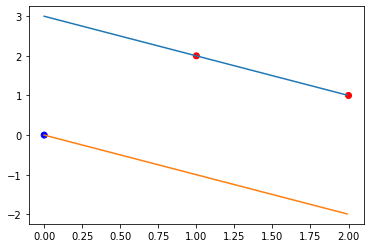

In [68]:
x = np.arange(0.0, 2.0, 0.01)
y1 = (1-w0-w_star[0]*x)/w_star[1]
y2 = (-1-w0-w_star[0]*x)/w_star[1]

plt.scatter([u1[0],u2[0],u3[0]],[u1[1],u2[1], u3[1]],c=['r','r','b'])
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

(e) Yes, the decision boundary correctly classify the training data. And it look like maximum-margin boundary  because the boudary is lie on closest data point by seeing the figure. By see the largrange formula, the KKT condition is also criteriion of max-margin with parametter lambda.

(f) Repeat parts (c) – (e) except for the following dataset:

lambda1 = 2.000000, lambda2 = 2.000000, lambda3 = 4.000000, miu = 5.000000
KKT condition of primal Largrange fomular is: True
w_star =  [2. 2.] , w0 =  -5.0
KKT check on w_star and w0: [ True]


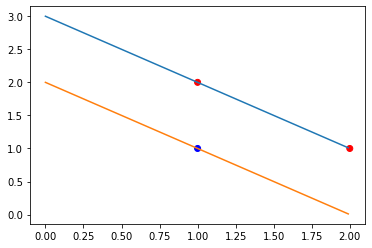

In [69]:
KKT_condition, KKTcondition1, KKTcondition2, w_star, w0, lambda_vector, miu = question2(z1, z2, z3, u1, u2, u3_prime)
print('lambda1 = %f, lambda2 = %f, lambda3 = %f, miu = %f' % (lambda_vector[0], lambda_vector[1], lambda_vector[2], miu))
print('KKT condition of primal Largrange fomular is:', KKT_condition)
print('w_star = ', w_star, ', w0 = ', w0)
print('KKT check on w_star and w0:', int(sum((KKTcondition1.astype(int)))) == len(KKTcondition1) and KKTcondition2)

x = np.arange(0.0, 2.0, 0.01)
y1 = (1-w0-w_star[0]*x)/w_star[1]
y2 = (-1-w0-w_star[0]*x)/w_star[1]

plt.scatter([u1[0],u2[0],u3_prime[0]],[u1[1],u2[1], u3_prime[1]],c=['r','r','b'])
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

The decision boudary is narrow down compare with figure in (d). This is because the data point of S2 to closer to data point of S1, which make the gap is narrow down.

(g) How do you think the boundary will change (relative to (f)) if we instead use the following data

In [70]:
KKT_condition, KKTcondition1, KKTcondition2, w_star, w0, lambda_vector, miu = question2(z1, z2, z3, u1, u2, u3_prime2)
print('lambda1 = %f, lambda2 = %f, lambda3 = %f, miu = %f' % (lambda_vector[0], lambda_vector[1], lambda_vector[2], miu))
print('KKT condition of primal Largrange fomular is:', KKT_condition)
print('w_star = ', w_star, ', w0 = ', w0)
print('KKT check on w_star and w0:', int(sum((KKTcondition1.astype(int)))) == len(KKTcondition1) and KKTcondition2)

lambda1 = 2.222222, lambda2 = -0.444444, lambda3 = 1.777778, miu = 3.000000
KKT condition of primal Largrange fomular is: True
w_star =  [1.33333333 1.33333333] , w0 =  -3.0
KKT check on w_star and w0: False


lambda1 = 1.600000, lambda2 = 0.000000, lambda3 = 1.600000, miu = 2.200000
KKT condition of primal Largrange fomular is: True
w_star =  [1.6 0.8] , w0 =  -2.200000000000002
KKT check on w_star and w0: True


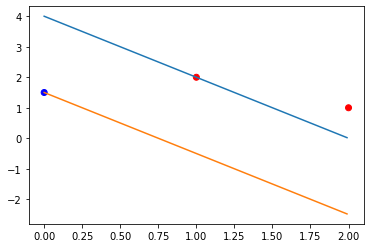

In [75]:
# Condition 1 is not satisfied at lambda2 < 0 ==> Set lambda2 = 0 we have
A_later = np.array([[z1*z1*np.inner(u1,u1),  z1*z3*np.inner(u1,u3_prime2), -z1],
              [z3*z1*np.inner(u3_prime2,u1),  z3*z3*np.inner(u3_prime2,u3_prime2), -z3],
              [                   z1,                      z3,   0]])
b_later = np.array([1,1,0])

# (i) Use NumPy to invert your matrix, and to calculate the resulting values for lambda_vector and µ_vector.
rho_later = np.dot(np.linalg.inv(A_later),b_later.reshape(3,1))
# (ii) Check KKT conditions for lambda.
lambda_vector = np.array([float(rho_later[0]) , 0, float(rho_later[1])])
miu = rho_later[2]
KKT_condition = np.sum(lambda_vector.reshape(1,3)*[z1, z2, z3]) < 1e-15
# (iii) Calculate the optimal (nonaugmented) weight vector 𝑤∗ by using your result from Problem 1(c)(i). 
# And, find the optimal bias term 𝑤' using one of the KKT conditions from Problem 1(b).
w_star = lambda_vector[0]*z1*u1 + lambda_vector[1]*z2*u2 + lambda_vector[2]*z3*u3_prime2
w0 = 1/z1 - np.inner(w_star,u1)
# (iv) Check that the resulting 𝑤 and 𝑤' satisfy the KKT conditions on 𝑤 and 𝑤' of Pr.1(c).
# Condition 1:
KKTcondition1 = lambda_vector >= 0
# Condition 2:
KKTcondition2 = lambda_vector[0]*(z1*(np.inner(w_star,u1) + w0)-1) < 1e-15 and\
    lambda_vector[1]*(z2*(np.inner(w_star,u2) + w0)-1) < 1e-15 and\
    lambda_vector[2]*(z3*(np.inner(w_star,u3_prime2) + w0)-1) < 1e-14
print('lambda1 = %f, lambda2 = %f, lambda3 = %f, miu = %f' % (lambda_vector[0], lambda_vector[1], lambda_vector[2], miu))
print('KKT condition of primal Largrange fomular is:', KKT_condition)
print('w_star = ', w_star, ', w0 = ', w0)
print('KKT check on w_star and w0:', int(sum((KKTcondition1.astype(int)))) == len(KKTcondition1) and KKTcondition2)
x = np.arange(0.0, 2.0, 0.01)
y1 = (1-w0-w_star[0]*x)/w_star[1]
y2 = (-1-w0-w_star[0]*x)/w_star[1]

plt.scatter([u1[0],u2[0],u3_prime2[0]],[u1[1],u2[1], u3_prime2[1]],c=['r','r','b'])
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

Because we cant express lambda > 0 on largrange formular, it is best to track KKT condition. When the condition is not satisfied, re-calculate the w_star which make the plot is different. Now the max-margin plot can only put 1 nearest point on the boundary.